# **O objetivo desse código é trabalhar com arquivos shapefile. Existem duas formas de obter esses arquivos:**
1. IBGE: https://geoftp.ibge.gov.br/organizacao_do_territorio/
2. Biblioteca Geobr: https://github.com/ipeaGIT/geobr

# **1° Passo:** Instalando bibliotecas

In [1]:
# Instalando o Salem (usado para mascarar regiões)
!pip install rasterio
!pip install pyproj
!pip install geopandas
!pip install salem

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.9 MB/s eta 0:00:00


# **2° Passo:** Importando bibliotecas

In [2]:
import salem
import warnings
warnings.filterwarnings("ignore")

# **3° Passo:** Montando o drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **4° Passo:** Definido caminho do drive

In [4]:
dir = '/content/drive/MyDrive/PYHTON/00_GITHUB/00c_CODIGOS_EXTRAS_PYTHON/'

# **1° Modo:** Shapefiles do IBGE
- Os shapefile do IBGE são baixados do FTP:
https://geoftp.ibge.gov.br/organizacao_do_territorio/

## **Baixando os dados**

In [5]:
# Shapefile dos todos ESTADOS brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
!unzip -o /content/br_unidades_da_federacao.zip

--2023-07-07 19:29:14--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10912177 (10M) [application/zip]
Saving to: ‘br_unidades_da_federacao.zip’

br_unidades_da_fede 100%[===================>]  10.41M  6.20MB/s    in 1.7s    

2023-07-07 19:29:17 (6.20 MB/s) - ‘br_unidades_da_federacao.zip’ saved [10912177/10912177]

Archive:  /content/br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          


In [6]:
# Shapefile de um ESTADO específico
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/MG/mg_unidades_da_federacao.zip
!unzip -o /content/mg_unidades_da_federacao.zip

--2023-07-07 19:29:17--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/MG/mg_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 363466 (355K) [application/zip]
Saving to: ‘mg_unidades_da_federacao.zip’

mg_unidades_da_fede 100%[===================>] 354.95K   532KB/s    in 0.7s    

2023-07-07 19:29:18 (532 KB/s) - ‘mg_unidades_da_federacao.zip’ saved [363466/363466]

Archive:  /content/mg_unidades_da_federacao.zip
 extracting: MG_UF_2019.cpg          
  inflating: MG_UF_2019.dbf          
  inflating: MG_UF_2019.prj          
  inflating: MG_UF_2019.shp          
  inflating: MG_UF_2019.shx          


In [7]:
# Shapefile de todas as CIDADES do Brasil
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_municipios_20200807.zip
!unzip -o /content/br_municipios_20200807.zip

--2023-07-07 19:29:19--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_municipios_20200807.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170630009 (163M) [application/zip]
Saving to: ‘br_municipios_20200807.zip’

br_municipios_20200 100%[===================>] 162.72M  16.7MB/s    in 11s     

2023-07-07 19:29:30 (15.0 MB/s) - ‘br_municipios_20200807.zip’ saved [170630009/170630009]

Archive:  /content/br_municipios_20200807.zip
 extracting: BR_Municipios_2019.cpg  
  inflating: BR_Municipios_2019.dbf  
  inflating: BR_Municipios_2019.prj  
  inflating: BR_Municipios_2019.sbn  
  inflating: BR_Municipios_2019.sbx  
  inflating: BR_Municipios_2019.shp  
  inflating: BR_Municipios_2019.shx  


In [8]:
# Shapefile das MESOREGIÕES do Brasil
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_mesorregioes.zip
!unzip -o /content/br_mesorregioes.zip

--2023-07-07 19:29:33--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_mesorregioes.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31189388 (30M) [application/zip]
Saving to: ‘br_mesorregioes.zip’

br_mesorregioes.zip 100%[===================>]  29.74M  9.84MB/s    in 3.0s    

2023-07-07 19:29:37 (9.84 MB/s) - ‘br_mesorregioes.zip’ saved [31189388/31189388]

Archive:  /content/br_mesorregioes.zip
 extracting: BR_Mesorregioes_2019.cpg  
  inflating: BR_Mesorregioes_2019.dbf  
  inflating: BR_Mesorregioes_2019.prj  
  inflating: BR_Mesorregioes_2019.shp  
  inflating: BR_Mesorregioes_2019.shx  


## **Explorando os dados**

In [9]:
# lendo shapefile de todos Estados do Brasil
estados_ibge = salem.read_shapefile('/content/BR_UF_2019.shp')
estados_ibge

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry,min_x,max_x,min_y,max_y
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4...",-66.810253,-59.774357,-13.693700,-7.975868
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828...",-73.990450,-66.623754,-11.145561,-7.111824
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620...",-73.801558,-56.097558,-9.818046,2.246631
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416...",-64.825254,-58.886884,-1.580633,5.271841
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...",-58.898328,-46.061425,-9.841153,2.591027
5,16,Amapá,AP,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",-54.876250,-49.875682,-1.236176,4.508817
6,17,Tocantins,TO,Norte,"POLYGON ((-48.23163 -5.94614, -48.23011 -5.938...",-50.742064,-45.699265,-13.467713,-5.168381
7,21,Maranhão,MA,Nordeste,"MULTIPOLYGON (((-44.53830 -2.02124, -44.53742 ...",-48.755151,-41.795884,-10.261765,-1.049328
8,22,Piauí,PI,Nordeste,"POLYGON ((-42.91539 -6.64607, -42.91645 -6.644...",-46.028207,-40.370510,-10.928756,-2.749753
9,23,Ceará,CE,Nordeste,"POLYGON ((-41.18292 -4.01797, -41.18552 -4.017...",-41.423518,-37.252659,-7.858182,-2.784323


In [10]:
# selecionando um Estado
estado_ibge = estados_ibge.loc[ estados_ibge['SIGLA_UF'] == 'MG' ]
estado_ibge

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry,min_x,max_x,min_y,max_y
16,31,Minas Gerais,MG,Sudeste,"POLYGON ((-50.74208 -19.21384, -50.74241 -19.2...",-51.046082,-39.856829,-22.922755,-14.233181


In [11]:
# selecionando vários Estados
estado_ibge = estados_ibge.loc[ (estados_ibge['SIGLA_UF'] == 'MG') | (estados_ibge['SIGLA_UF'] == 'SP')]
estado_ibge

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry,min_x,max_x,min_y,max_y
16,31,Minas Gerais,MG,Sudeste,"POLYGON ((-50.74208 -19.21384, -50.74241 -19.2...",-51.046082,-39.856829,-22.922755,-14.233181
19,35,São Paulo,SP,Sudeste,"MULTIPOLYGON (((-48.03716 -25.35794, -48.03750...",-53.110112,-44.161365,-25.358000,-19.779656


In [12]:
# lendo shapefile de MG
mg_ibge = salem.read_shapefile('/content/MG_UF_2019.shp')
mg_ibge

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry,min_x,max_x,min_y,max_y
0,31,Minas Gerais,MG,Sudeste,"POLYGON ((-50.74208 -19.21384, -50.74241 -19.2...",-51.046082,-39.856829,-22.922755,-14.233181


In [13]:
# lendo shapefile de todas as cidades do Brasil
cidades_ibge = salem.read_shapefile('/content/BR_Municipios_2019.shp')
cidades_ibge

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,min_x,max_x,min_y,max_y
0,1100015,Alta Floresta D'Oeste,RO,7067.025,"POLYGON ((-62.22630 -11.89037, -62.20670 -11.8...",-62.894079,-61.886511,-13.118942,-11.827457
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.58751 -9.84984, -63.58715 -9.849...",-63.618222,-62.422617,-10.288282,-9.669160
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...",-60.924764,-60.365289,-13.693700,-13.318590
3,1100049,Cacoal,RO,3792.892,"POLYGON ((-61.50114 -11.30119, -61.50104 -11.2...",-61.795798,-61.000595,-11.619209,-10.987534
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-61.51346 -13.28575, -61.51534 -13.2...",-61.908043,-60.716651,-13.363706,-13.004330
...,...,...,...,...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.284,"POLYGON ((-48.53842 -16.75003, -48.54051 -16.7...",-48.598694,-48.255546,-17.129362,-16.627415
5568,5222054,Vicentinópolis,GO,737.255,"POLYGON ((-49.90713 -17.61460, -49.90588 -17.6...",-50.087037,-49.684173,-17.899038,-17.577277
5569,5222203,Vila Boa,GO,1060.172,"POLYGON ((-47.07742 -15.06330, -47.07747 -15.0...",-47.235067,-46.873698,-15.314679,-14.671943
5570,5222302,Vila Propício,GO,2181.583,"POLYGON ((-48.91463 -15.20939, -48.91462 -15.2...",-49.092276,-48.561829,-15.570494,-14.861683


In [14]:
# selecionando uma cidade
itajuba_ibge = cidades_ibge[ cidades_ibge['NM_MUN'] == 'Itajubá']
itajuba_ibge

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,min_x,max_x,min_y,max_y
2611,3132404,Itajubá,MG,294.835,"POLYGON ((-45.51615 -22.43638, -45.51618 -22.4...",-45.530293,-45.261029,-22.539726,-22.339256


In [15]:
# lendo shafile das mesoregiões do Brasil
meso_ibge = salem.read_shapefile('BR_Mesorregioes_2019.shp')
meso_ibge

,CD_MESO,NM_MESO,SIGLA_UF,geometry,min_x,max_x,min_y,max_y
0,1101,Madeira-Guaporé,RO,"POLYGON ((-62.36913 -8.74356, -62.36981 -8.742...",-66.810253,-62.237056,-12.927886,-7.975868
1,1102,Leste Rondoniense,RO,"POLYGON ((-63.52996 -10.49261, -63.52913 -10.4...",-63.765837,-59.774357,-13.693700,-8.575759
2,1201,Vale do Juruá,AC,"POLYGON ((-73.33214 -8.47537, -73.33129 -8.471...",-73.990450,-69.443048,-10.000025,-7.111824
3,1202,Vale do Acre,AC,"POLYGON ((-70.62087 -10.70639, -70.62060 -10.5...",-71.101760,-66.623754,-11.145561,-8.366485
4,1301,Norte Amazonense,AM,"POLYGON ((-70.04635 0.06831, -70.04668 0.06830...",-70.058109,-60.357756,-3.813304,2.246631
...,...,...,...,...,...,...,...,...
134,5202,Norte Goiano,GO,"POLYGON ((-49.96317 -13.70275, -49.96373 -13.7...",-50.275514,-46.104644,-15.017751,-12.790362
135,5203,Centro Goiano,GO,"POLYGON ((-50.13951 -15.40040, -50.13715 -15.3...",-51.440520,-48.638247,-17.194322,-14.200333
136,5204,Leste Goiano,GO,"POLYGON ((-46.71452 -13.38543, -46.71448 -13.3...",-49.217498,-45.907155,-17.355853,-13.054991
137,5205,Sul Goiano,GO,"POLYGON ((-52.83237 -16.77216, -52.83219 -16.7...",-53.248562,-47.263967,-19.499151,-16.281632


In [16]:
# selecionando uma mesoregião
meso_mg_ibge = meso_ibge[ meso_ibge['SIGLA_UF'] =='SP' ]
meso_mg_ibge

,CD_MESO,NM_MESO,SIGLA_UF,geometry,min_x,max_x,min_y,max_y
84,3501,São José do Rio Preto,SP,"POLYGON ((-50.81212 -20.53115, -50.81288 -20.5...",-51.109390,-48.691924,-21.673285,-19.779656
85,3502,Ribeirão Preto,SP,"POLYGON ((-47.86981 -20.07615, -47.86960 -20.0...",-48.894441,-47.044224,-21.808205,-19.960702
86,3503,Araçatuba,SP,"POLYGON ((-51.57519 -20.62342, -51.57518 -20.6...",-51.772476,-49.816618,-21.725785,-20.280092
87,3504,Bauru,SP,"POLYGON ((-49.42280 -22.29420, -49.42278 -22.2...",-50.274220,-47.927466,-23.721475,-21.274953
88,3505,Araraquara,SP,"POLYGON ((-48.47108 -21.51269, -48.47221 -21.5...",-49.241217,-47.510158,-22.240092,-21.370584
89,3506,Piracicaba,SP,"POLYGON ((-48.23485 -22.52038, -48.23523 -22.5...",-48.329978,-47.074851,-23.223234,-22.063582
90,3507,Campinas,SP,"POLYGON ((-47.19749 -22.09872, -47.23234 -22.0...",-47.626466,-46.332566,-23.226034,-21.263966
91,3508,Presidente Prudente,SP,"POLYGON ((-51.96222 -21.49331, -51.96210 -21.4...",-53.110112,-50.609470,-22.697179,-21.050757
92,3509,Marília,SP,"POLYGON ((-50.73710 -21.87756, -50.73415 -21.8...",-50.864662,-49.422776,-22.593135,-21.656767
93,3510,Assis,SP,"POLYGON ((-50.78354 -22.43519, -50.78391 -22.4...",-51.298203,-49.197653,-23.541123,-22.019328


In [17]:
# lendo shapefile das cinco regiões do Brasil
regioes_ibge = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/main/cinco_regioes_brasil/regioes_2010.shp')
regioes_ibge

,id,nome,sigla,geometry,min_x,max_x,min_y,max_y
0,1,Sul,S,"MULTIPOLYGON (((-52.06416 -22.53384, -52.05556...",-57.642721,-48.023080,-33.751358,-22.516211
1,2,Sudeste,SE,"MULTIPOLYGON (((-40.72383 -20.84178, -40.72804...",-53.108193,-39.666461,-25.310889,-14.232851
2,3,Norte,N,"MULTIPOLYGON (((-66.61930 -9.89360, -66.62231 ...",-73.990238,-45.697110,-13.693239,5.270972
3,4,Nordeste,NE,"MULTIPOLYGON (((-35.15204 -8.91295, -35.15366 ...",-48.754713,-32.390875,-18.348743,-1.045085
4,5,Centro-Oeste,CO,"MULTIPOLYGON (((-47.30861 -16.03549, -47.31095...",-61.632164,-45.906861,-24.069510,-7.348660


In [18]:
# seleciona uma região em específico
regiao_ibge = regioes_ibge[ regioes_ibge['nome'] =='Nordeste' ]
regiao_ibge

,id,nome,sigla,geometry,min_x,max_x,min_y,max_y
3,4,Nordeste,NE,"MULTIPOLYGON (((-35.15204 -8.91295, -35.15366 ...",-48.754713,-32.390875,-18.348743,-1.045085


Aplicando mascara a um dado

--2023-07-07 19:30:43--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Archive:  /content/br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          


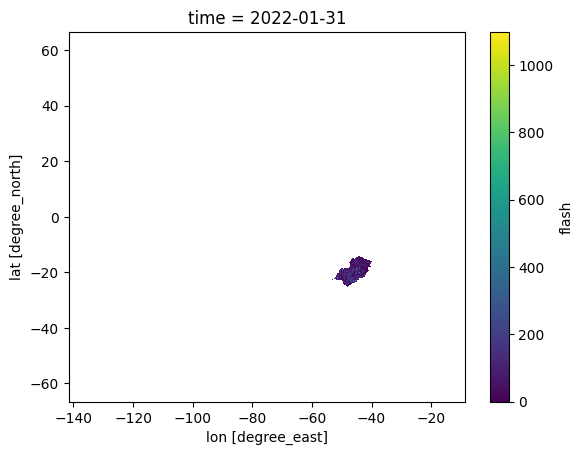

In [19]:
# importa xarray
import xarray as xr

# baixa o shapefile de todos ESTADOS brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
!unzip -o /content/br_unidades_da_federacao.zip

# lendo shapefile
estados_ibge = salem.read_shapefile('/content/BR_UF_2019.shp')

# selecionando o Estado de MG e SP
estado_ibge = estados_ibge.loc[ (estados_ibge['SIGLA_UF'] == 'MG') | (estados_ibge['SIGLA_UF'] == 'SP')]

# leitura do aquivo netcdf
ds = xr.open_dataset(f'{dir}input/flash_goes16_mensal_2022-01.nc')

# aplica a mascara no dado Netcdf
dsr = ds.salem.roi(shape=estado_ibge)

# plota figura
dsr['flash'].plot()

# **2° Modo:** Shapefiles do GeoBr
- A biblioteca GeoBr encontra-se em: https://github.com/ipeaGIT/geobr e https://pypi.org/project/geobr/

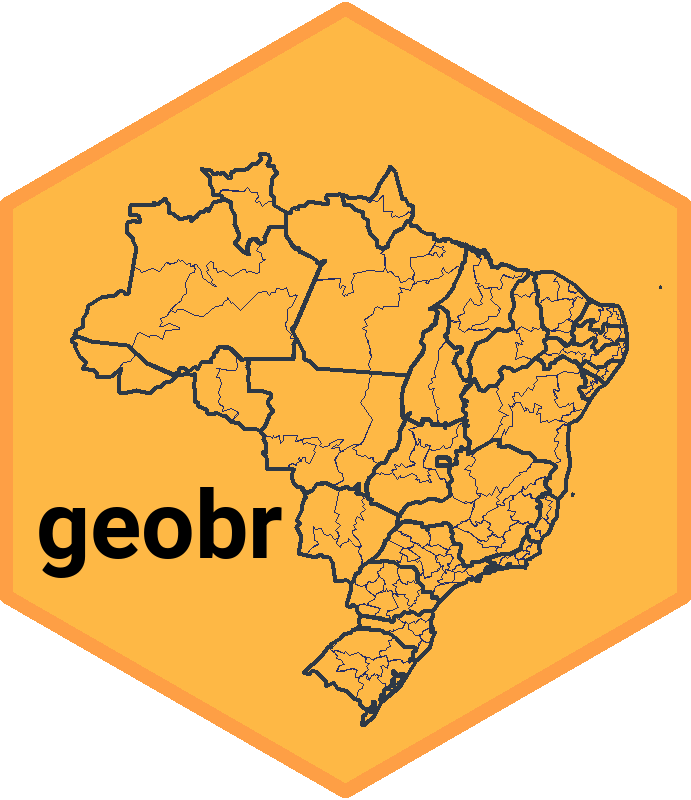

**instalação e importação do geobr**

In [20]:
# instalando o geobr
!pip install geobr -q

# importando o geobr
import geobr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.1/928.1 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.7 MB/s eta 0:00:00


a) **selecionando os `ESTADOS`**

In [21]:
# selecionando os estados do Brasil
estados_geobr = geobr.read_state(year=2020)

# selecionando um estado
estado_geobr = estados_geobr[estados_geobr['abbrev_state'] == 'MG']
estado_geobr

,code_state,abbrev_state,name_state,code_region,name_region,geometry
16,31.0,MG,Minas Gerais,3.0,Sudeste,"MULTIPOLYGON (((-50.74037 -19.21316, -50.74013..."


<Axes: >

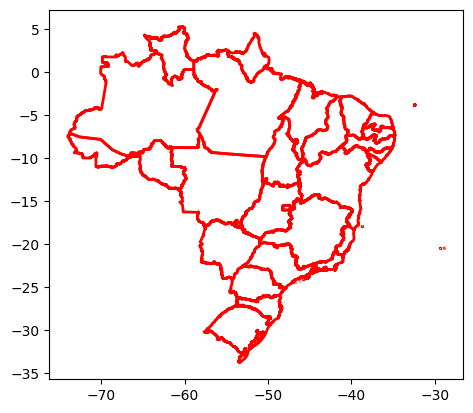

In [22]:
# plota figura
!pip install descartes -q
estados_geobr.plot(edgecolor='red',
                  facecolor='none',
                  linewidth=2,
                  alpha=1)

<Axes: >

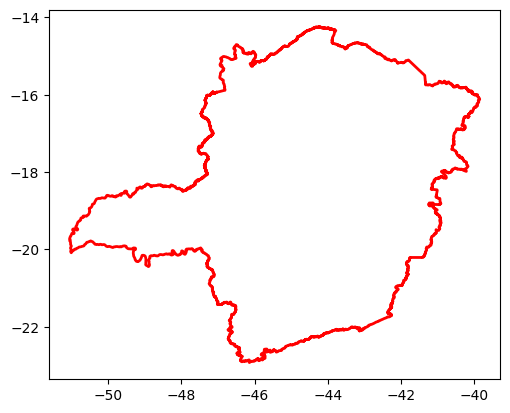

In [23]:
# plota figura
estado_geobr.plot(edgecolor='red',
                 facecolor='none',
                 linewidth=2,
                 alpha=1)

b) **selecionando a `Região Metroplitana de SP`**

In [24]:
# carregando as regioes metropolitanas do Brasil
region_metro_geobr = geobr.read_metro_area(year=2018)

# selecionando as regioes metropolitanas do estado de SP
rm_estado_sp_geobr = region_metro_geobr[region_metro_geobr['abbrev_state'] == 'SP']

# selecionando a região metropolitana da cidade de SP
rmsp_geobr = rm_estado_sp_geobr[  rm_estado_sp_geobr['name_muni'] == 'São Paulo']
rmsp_geobr

,code_muni,name_muni,code_state,abbrev_state,name_metro,type,subdivision,legislation,legislation_date,geometry
1365,3550308.0,São Paulo,35.0,SP,RM São Paulo,RM,Todas as sub-regiões,Lei Complementar 1.139,16.06.2011,"MULTIPOLYGON (((-46.46934 -23.48106, -46.46047..."


<Axes: >

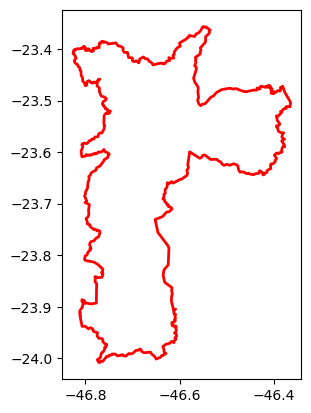

In [25]:
# plota figura
rmsp_geobr.plot(edgecolor='red',
                facecolor='none',
                linewidth=2,
                alpha=1)

c) **selecionando `MUNICÍPIOS`**

In [26]:
# leitura de todos os municípios do Brasil para um determinado ano
municipios_geobr = geobr.read_municipality(code_muni="all", year=2020)
municipios_geobr.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,1100015.0,Alta Floresta D'oeste,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.19465 -11.82746, -62.18945..."
1,1100023.0,Ariquemes,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.53648 -9.73222, -62.52765 ..."
2,1100031.0,Cabixi,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-60.37119 -13.36655, -60.37661..."
3,1100049.0,Cacoal,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.00080 -11.29737, -61.00103..."
4,1100056.0,Cerejeiras,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-61.49976 -13.00525, -61.49426..."


In [27]:
# selecionando Itajubá
municipio_geobr = municipios_geobr[municipios_geobr['name_muni'] == 'Itajubá']
municipio_geobr

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
2611,3132404.0,Itajubá,31.0,MG,Minas Gerais,3.0,Sudeste,"MULTIPOLYGON (((-45.33999 -22.33926, -45.33521..."


<Axes: >

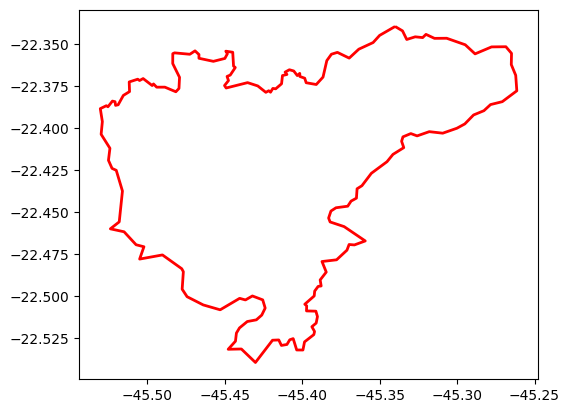

In [28]:
# plota figura
municipio_geobr.plot(edgecolor='red',
               facecolor='none',
               linewidth=2,
               alpha=1)

Aplicando mascara a um dado

In [29]:
# lendo shapefile IBGE
estados_ibge = salem.read_shapefile('/content/BR_UF_2019.shp')

# lendo shapefile GEOBR
estados_geobr = geobr.read_state(year=2020)
estado_geobr = estados_geobr[estados_geobr['abbrev_state'] == 'MG']

In [30]:
# mostrando os dados do IBGE
display(estados_ibge.head())

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry,min_x,max_x,min_y,max_y
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4...",-66.810253,-59.774357,-13.693700,-7.975868
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828...",-73.990450,-66.623754,-11.145561,-7.111824
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620...",-73.801558,-56.097558,-9.818046,2.246631
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416...",-64.825254,-58.886884,-1.580633,5.271841
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...",-58.898328,-46.061425,-9.841153,2.591027


In [31]:
# mostrando os dados do GEOBR
display(estados_geobr.head())

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-65.38150 -10.42907, -65.38013..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
2,13.0,AM,Amazônas,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


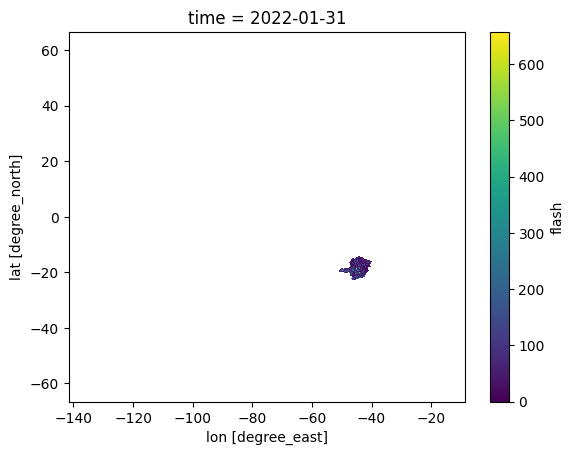

In [32]:
# instalando o geobr
!pip install geobr -q

# importando bibliotecas
import geobr
import xarray as xr

# selecionando um estado do Brasil. Vamos selecionar o Estado de Minas Gerais
estados_geobr = geobr.read_state(year=2020)
estado_geobr = estados_geobr[estados_geobr['abbrev_state'] == 'MG']

# definindo o sistema de referência de coordenadas
estado_geobr.crs = 'epsg:4674'

# leitura do aquivo netcdf
ds = xr.open_dataset(f'{dir}input/flash_goes16_mensal_2022-01.nc')

# aplica a mascara no dado Netcdf
dsr = ds.salem.roi(shape=estado_geobr)

# plota figura
dsr['flash'].plot()